In [1]:
from utils.common import is_cluster
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import numpy as np
if is_cluster():
    summary_dir = r"/vol/sci/bio/data/gil.greenbaum/shahar.mazie/vcf/hgdp/classes/summary/"
else:
    summary_dir = r"/home/lab2/shahar/cluster_dirs/vcf/hgdp/classes/summary/"
nmi_matrix_path =  summary_dir + 'nmi_sum_matrix.csv'
df = pd.read_csv(nmi_matrix_path)
ns_ss = 0.01
NMI_TYPES = ['AllNodes', 'Leaves_WithOverlap']
SCORES = ['max']   # ['max', 'lfk', 'sum']
pairs = itertools.product(NMI_TYPES, SCORES)
ALL_SCORES_TYPES = [f'{p[0]}_{p[1]}' for p in pairs]
mac_min_range = 2
mac_max_range = 70
maf_min_range = 1
maf_max_range = 49
SIZE2COLOR_DICT = {1000: 'b', 5000:'g', 10000: 'r'}
mac_class_names = np.arange(mac_min_range, mac_max_range+1)
maf_class_names = np.arange(maf_min_range, maf_max_range+1) / 100

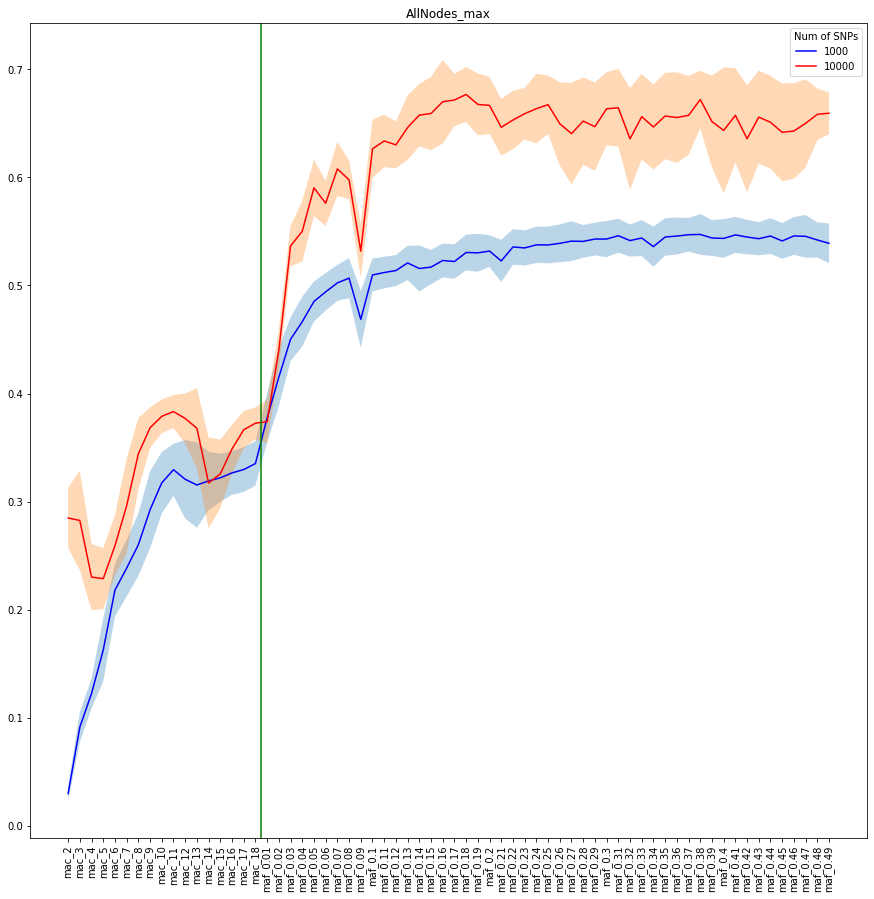

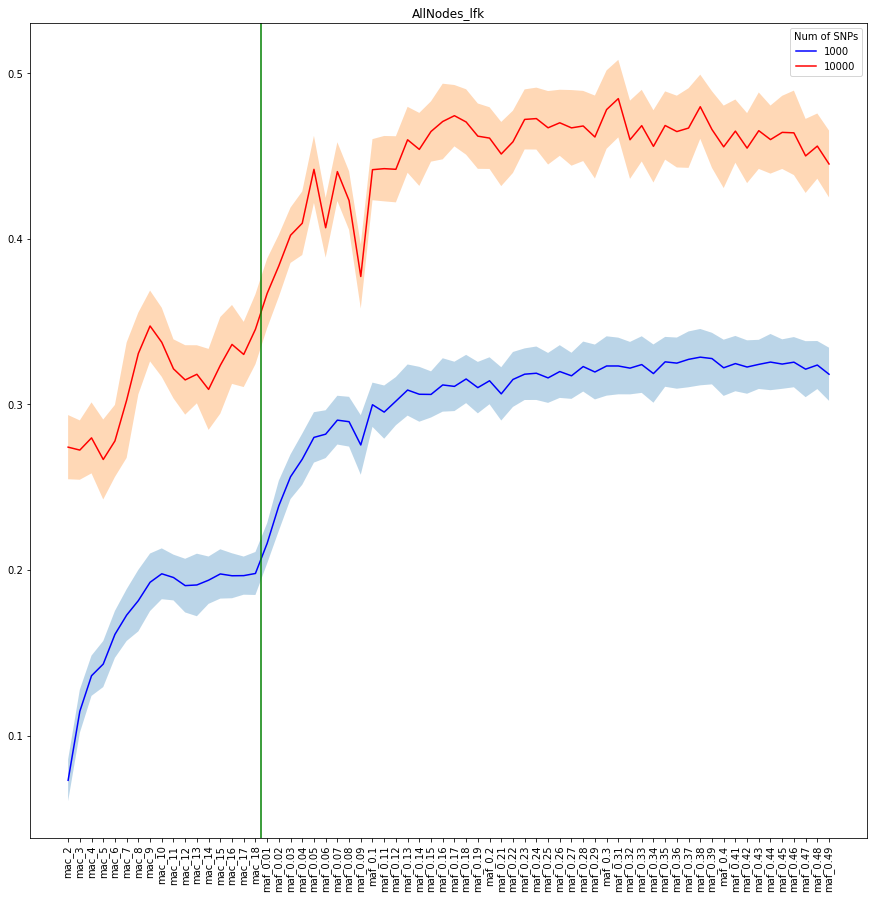

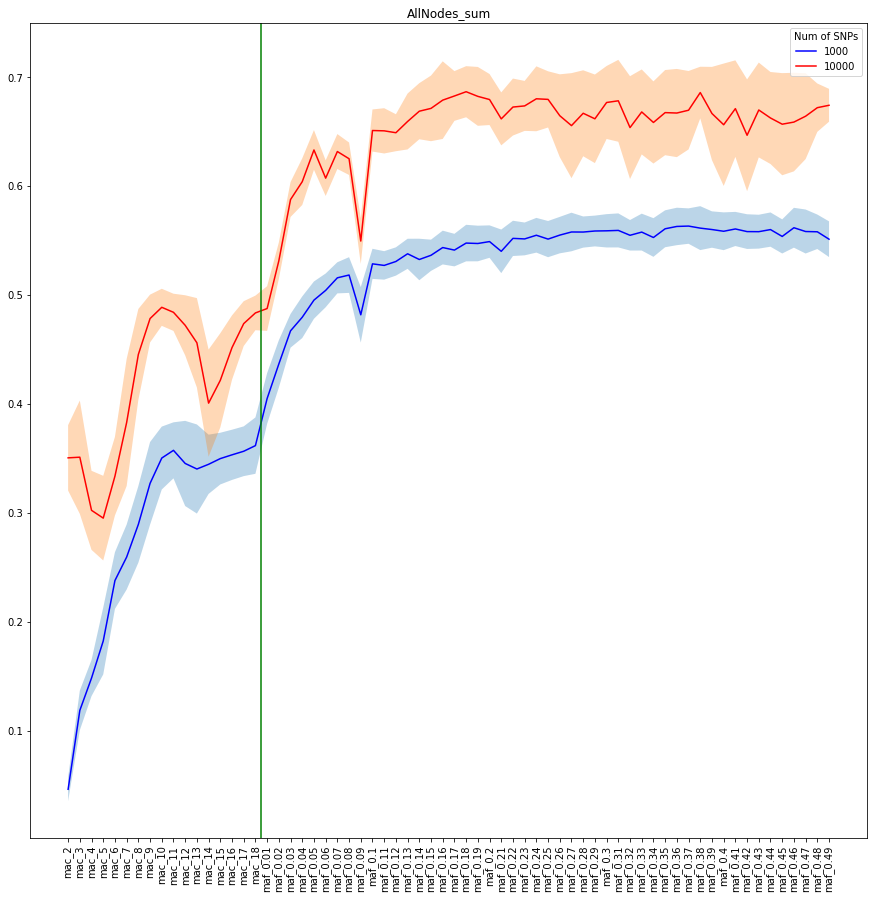

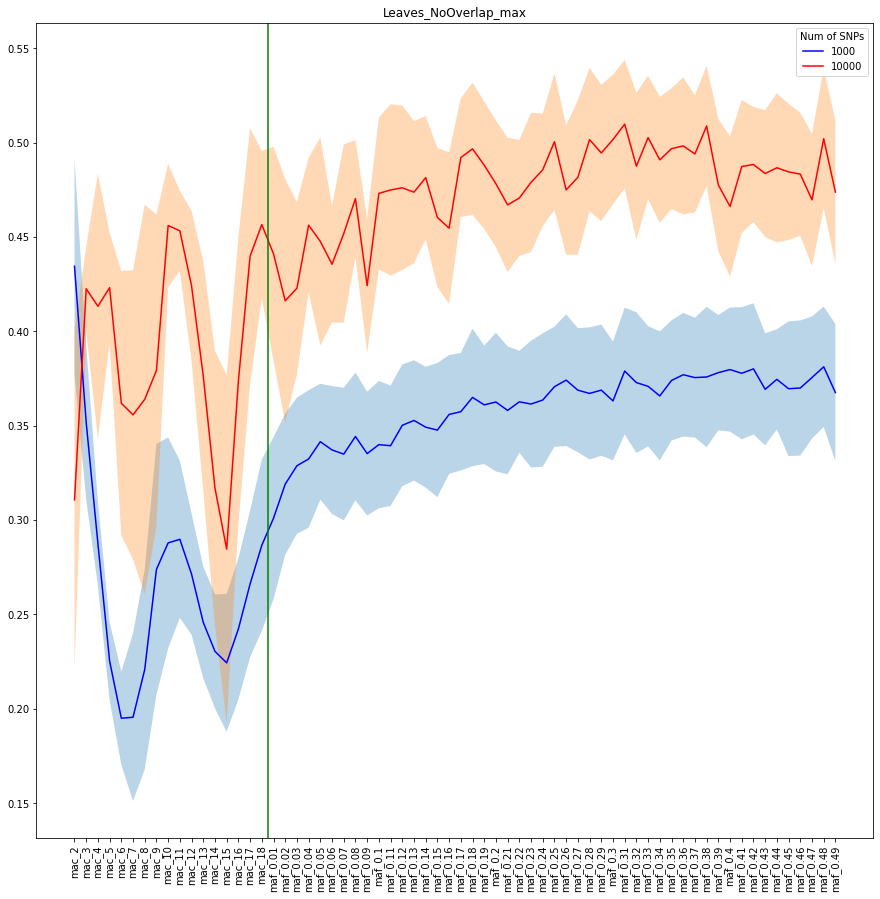

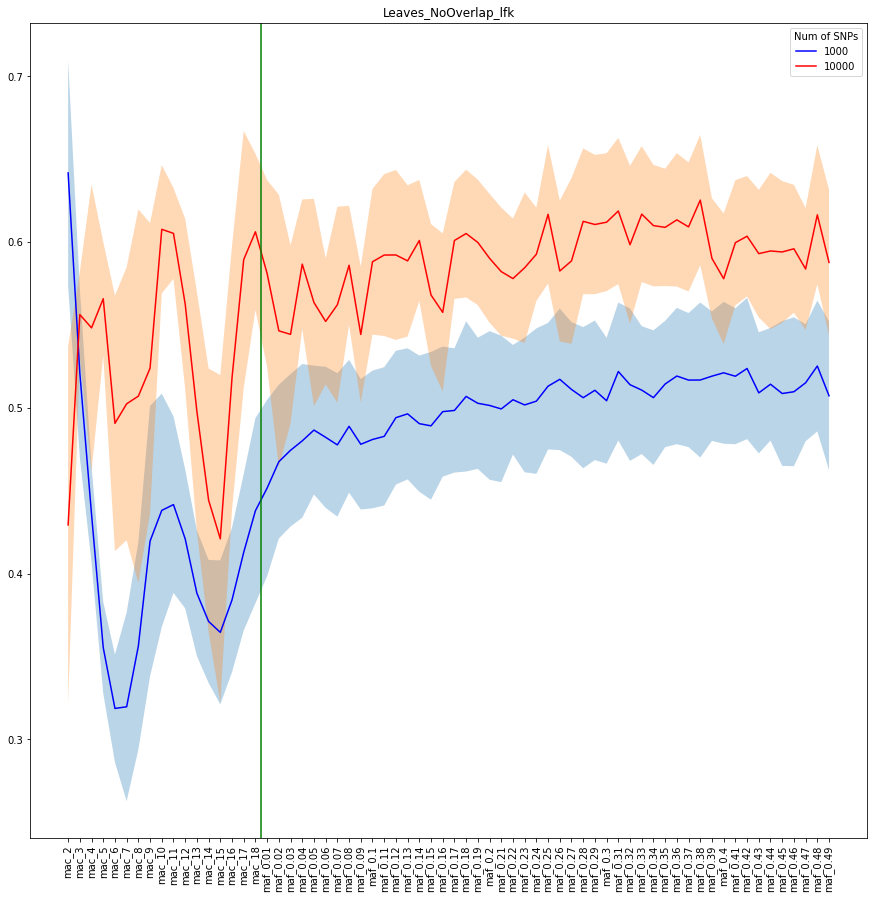

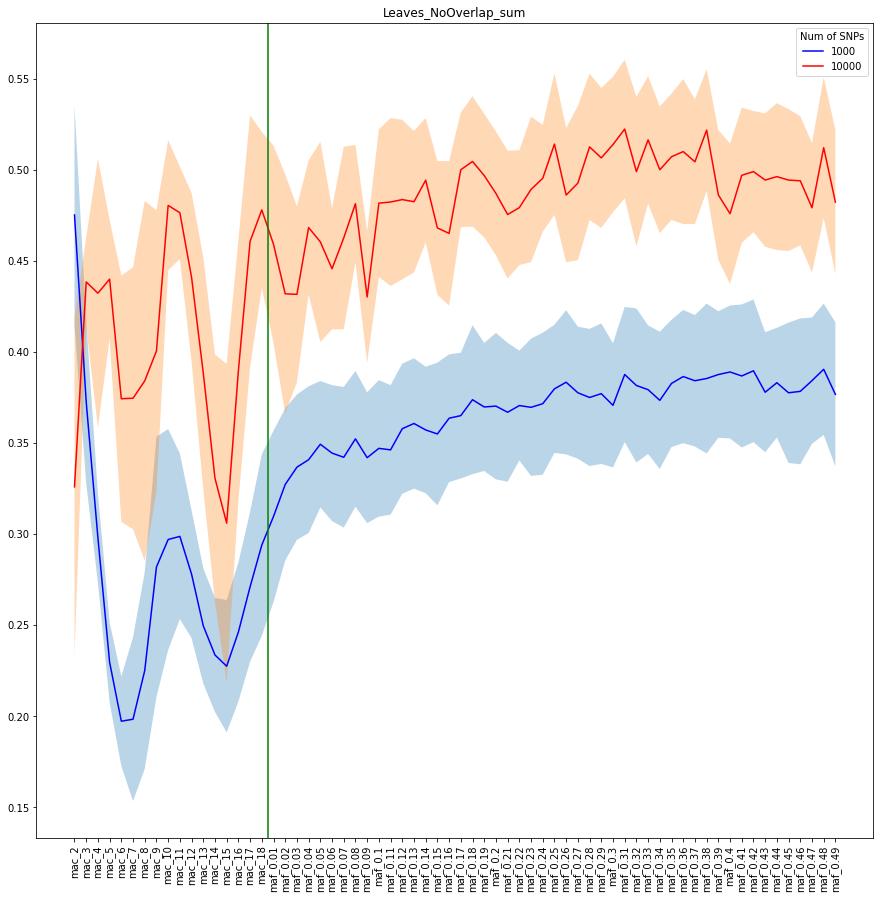

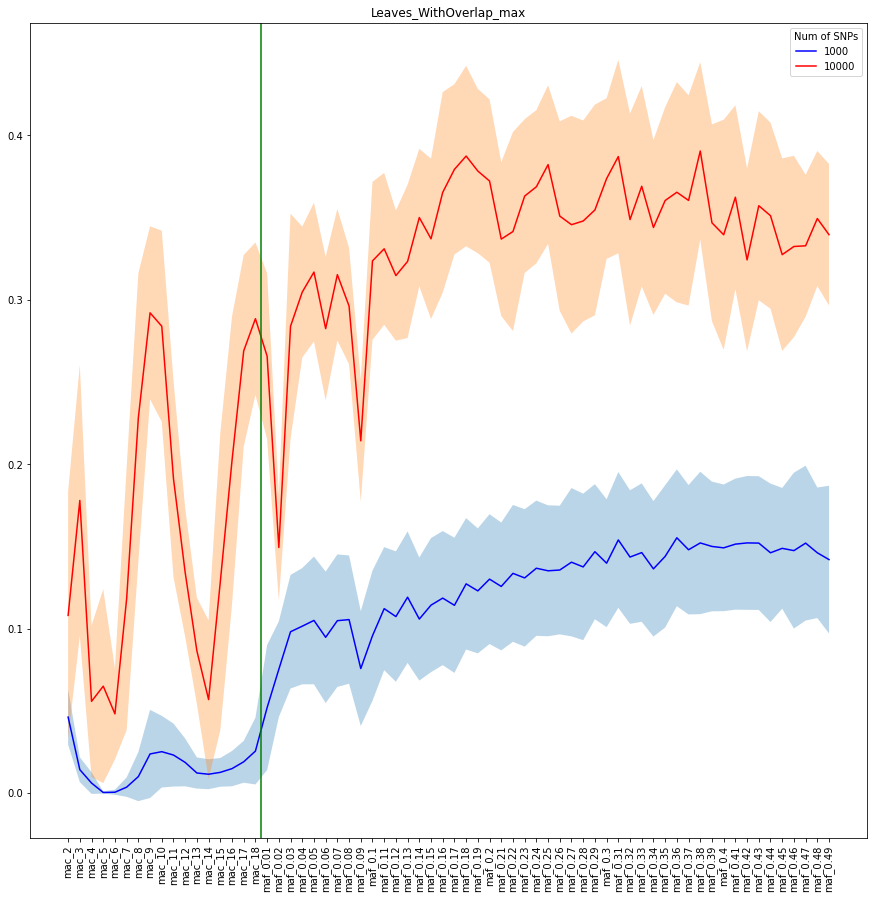

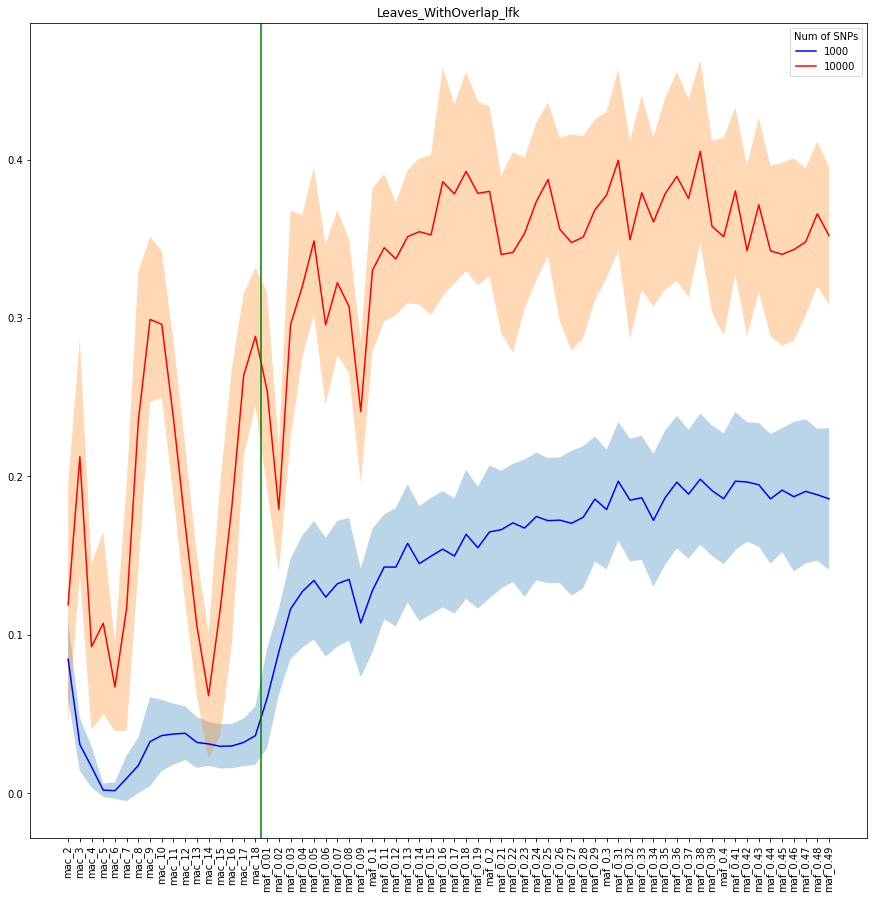

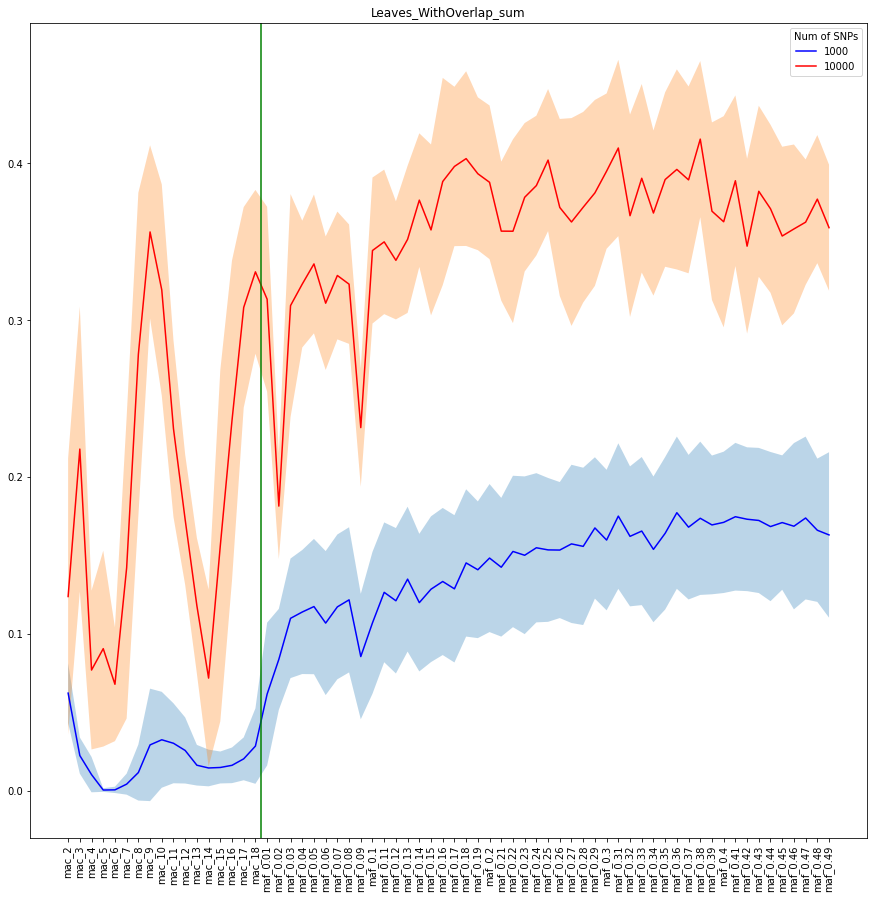

In [3]:
for score in ALL_SCORES_TYPES:
    for mac_maf in ['mac', 'maf']:
        is_mac = mac_maf == 'mac'
        class_names = mac_class_names if is_mac else maf_class_names
        sizes = [1000, 5000]
        f = plt.figure()
        f.set_figwidth(15)
        f.set_figheight(15)
        ax = f.add_subplot(111)
        for num_of_snp in sizes:
            avg = []
            std = []
            min_range = mac_min_range if is_mac else maf_min_range
            max_range = mac_max_range if is_mac else maf_max_range
            for val in range(min_range, max_range+1):
                # in maf we take 0.x
                if not is_mac:
                    val = f'{val * 1.0/100}'
                class_name = f'ss_{ns_ss}_{mac_maf}_{val}_{num_of_snp}'
                class_values = df[df.Class == class_name]
                if len(class_values) == 0:
                    continue
                n = int(class_values['num_of_trees'])
                avg.append(float(class_values[f'{score}_avg']))
                std.append(float(class_values[f'{score}_std']))
            avg = np.array(avg)
            std = np.array(std)
            plt.plot(class_names, avg, color=SIZE2COLOR_DICT[num_of_snp], label=num_of_snp)
            plt.scatter(class_names, avg, color=SIZE2COLOR_DICT[num_of_snp])
            plt.fill_between(class_names, y1=avg - std, y2=avg + std, alpha=0.3, color=SIZE2COLOR_DICT[num_of_snp])
        plt.xlabel(f"{mac_maf}")
        plt.legend(title="Num of SNPs")
        plt.title(f'{score}')
        plt.savefig(f'{summary_dir}fix_size_nmi_scores/{mac_maf}_{score}.svg')
        plt.clf()
    